<a href="https://colab.research.google.com/github/mpunia/Begniers-guide/blob/main/Simple_LSTM_for_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
import chardet
file='/content/spam.csv'
with open(file , 'rb') as check_encoding:
  result = chardet.detect(check_encoding.read(1000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [4]:

df= pd.read_csv(file ,delimiter=',' , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2' , 'Unnamed: 3'  , 'Unnamed: 4'], axis=1)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No of hama nd spam')

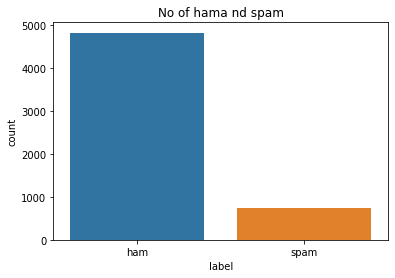

In [6]:
sns.countplot(df['v1'])
plt.xlabel('label')
plt.title('No of hama nd spam')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


So this is a imbalance dataset

In [8]:
from sklearn.preprocessing import LabelEncoder
X = df['v2']
y = df['v1']

le = LabelEncoder()
y = le.fit_transform(y)
Y = y.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size=0.20)

Tokenize the data and convert the text into sequence


In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words =1500
max_len = 120
tok = Tokenizer(num_words=1500)
tok.fit_on_texts(x_train)
sequence = tok.texts_to_sequences(x_train)
sequence_matrix = pad_sequences(sequence , maxlen= max_len)

In [11]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import sequence


def rnn():
  inputs = Input(name = 'input' , shape = [max_len])
  layer = Embedding(max_words , 40 , input_length = max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256 )(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1)(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs = inputs , outputs= layer)
  return model

Calling the function And compile the model

In [12]:
model = rnn()
model.summary()
model.compile(loss = 'binary_crossentropy' , optimizer = RMSprop(), metrics = ['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 120)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 120, 40)           60000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                26880     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

Fit on training data

In [13]:
model.fit(sequence_matrix,y_train , batch_size=128,epochs=12,validation_split=0.2, callbacks=[EarlyStopping(monitor= 'val_loss')])

Epoch 1/12
28/28 [==============================] - 4s 159ms/step - loss: 0.3030 - accuracy: 0.8951 - val_loss: 0.1534 - val_accuracy: 0.9630
Epoch 2/12
28/28 [==============================] - 4s 143ms/step - loss: 0.0811 - accuracy: 0.9801 - val_loss: 0.0752 - val_accuracy: 0.9809
Epoch 3/12
28/28 [==============================] - 4s 150ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0676 - val_accuracy: 0.9854
Epoch 4/12
28/28 [==============================] - 4s 152ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0665 - val_accuracy: 0.9821
Epoch 5/12
28/28 [==============================] - 4s 144ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0659 - val_accuracy: 0.9821
Epoch 6/12
28/28 [==============================] - 4s 141ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 7/12
28/28 [==============================] - 4s 140ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0682 - val_accuracy: 0.9765


In [14]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [15]:
accr = model.evaluate(test_sequences_matrix,y_test)


35/35 [==============================] - 1s 15ms/step - loss: 0.0783 - accuracy: 0.9839


In [16]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Test set
  Loss: 0.078
  Accuracy: 0.984
